In [1]:
import numpy as np
import pandas as pd

In [95]:
#df_1 = pd.read_csv('IRIS.csv')
#df_3 = pd.read_csv('Airline Paddenger Satisfaction.csv')
df_2 = pd.read_csv('healthcare-dataset-stroke-data.csv')

# DataFrame 1


In [29]:
# Создание нового DataFrame для бинаризированных данных
df_bin = pd.DataFrame()
df = df_1
# Бинаризация 'sepal_length'
step = 1
start, finish = df['sepal_length'].min(), df['sepal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_length({i}, {i+step})'] = df['sepal_length'].between(i, i+step, inclusive='left')

# Бинаризация 'sepal_width'
step = 1.25
start, finish = df['sepal_width'].min(), df['sepal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_width({i}, {i+step})'] = df['sepal_width'].between(i, i+step, inclusive='left')

# Бинаризация 'petal_length'
step = 2
start, finish = df['petal_length'].min(), df['petal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_length({i}, {i+step})'] = df['petal_length'].between(i, i+step, inclusive='left')

# Бинаризация 'petal_width'
step = 1
start, finish = df['petal_width'].min(), df['petal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_width({i}, {i+step})'] = df['petal_width'].between(i, i+step, inclusive='left')

df_bin['species'] = df['species']
df_bin['sample_id'] = ['iris_' + str(i) for i in range(df_bin.shape[0])]
df_bin.set_index('sample_id', inplace=True)

#df_bin['is_setosa'] = df_bin['species'] == 'Iris-virginica'
#df_bin.drop('species', axis=1, inplace=True)

df_bin

,"sepal_length(4.3, 5.3)","sepal_length(5.3, 6.3)","sepal_length(6.3, 7.3)","sepal_length(7.3, 8.3)","sepal_width(2.0, 3.25)","sepal_width(3.25, 4.5)","petal_length(1.0, 3.0)","petal_length(3.0, 5.0)","petal_length(5.0, 7.0)","petal_width(0.1, 1.1)","petal_width(1.1, 2.1)","petal_width(2.1, 3.1)",species
sample_id,,,,,,,,,,,,,
iris_0,True,False,False,False,False,True,True,False,False,True,False,False,Iris-setosa
iris_1,True,False,False,False,True,False,True,False,False,True,False,False,Iris-setosa
iris_2,True,False,False,False,True,False,True,False,False,True,False,False,Iris-setosa
iris_3,True,False,False,False,True,False,True,False,False,True,False,False,Iris-setosa
iris_4,True,False,False,False,False,True,True,False,False,True,False,False,Iris-setosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
iris_145,False,False,True,False,True,False,False,False,True,False,False,True,Iris-virginica
iris_146,False,False,True,False,True,False,False,False,True,False,True,False,Iris-virginica
iris_147,False,False,True,False,True,False,False,False,True,False,True,False,Iris-virginica


In [30]:
df_setosa = df_bin.copy()
df_versicolor = df_bin.copy()
df_virginica = df_bin.copy()

# Теперь вы можете модифицировать каждый DataFrame независимо
df_setosa['is_setosa'] = df_setosa['species'] == 'Iris-setosa'
df_setosa.drop('species', axis=1, inplace=True)

df_versicolor['is_versicolor'] = df_versicolor['species'] == 'Iris-versicolor'
df_versicolor.drop('species', axis=1, inplace=True)

df_virginica['is_virginica'] = df_virginica['species'] == 'Iris-virginica'
df_virginica.drop('species', axis=1, inplace=True)

In [32]:
df_setosa.to_csv('binarized_data_is_setosa.csv', index=True)


# DataFrame 2

In [96]:
df = df_2
# Основная информация о датасете
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

In [97]:
df.drop(columns='id', inplace=True)
df.dropna(how='any', inplace=True)

In [76]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


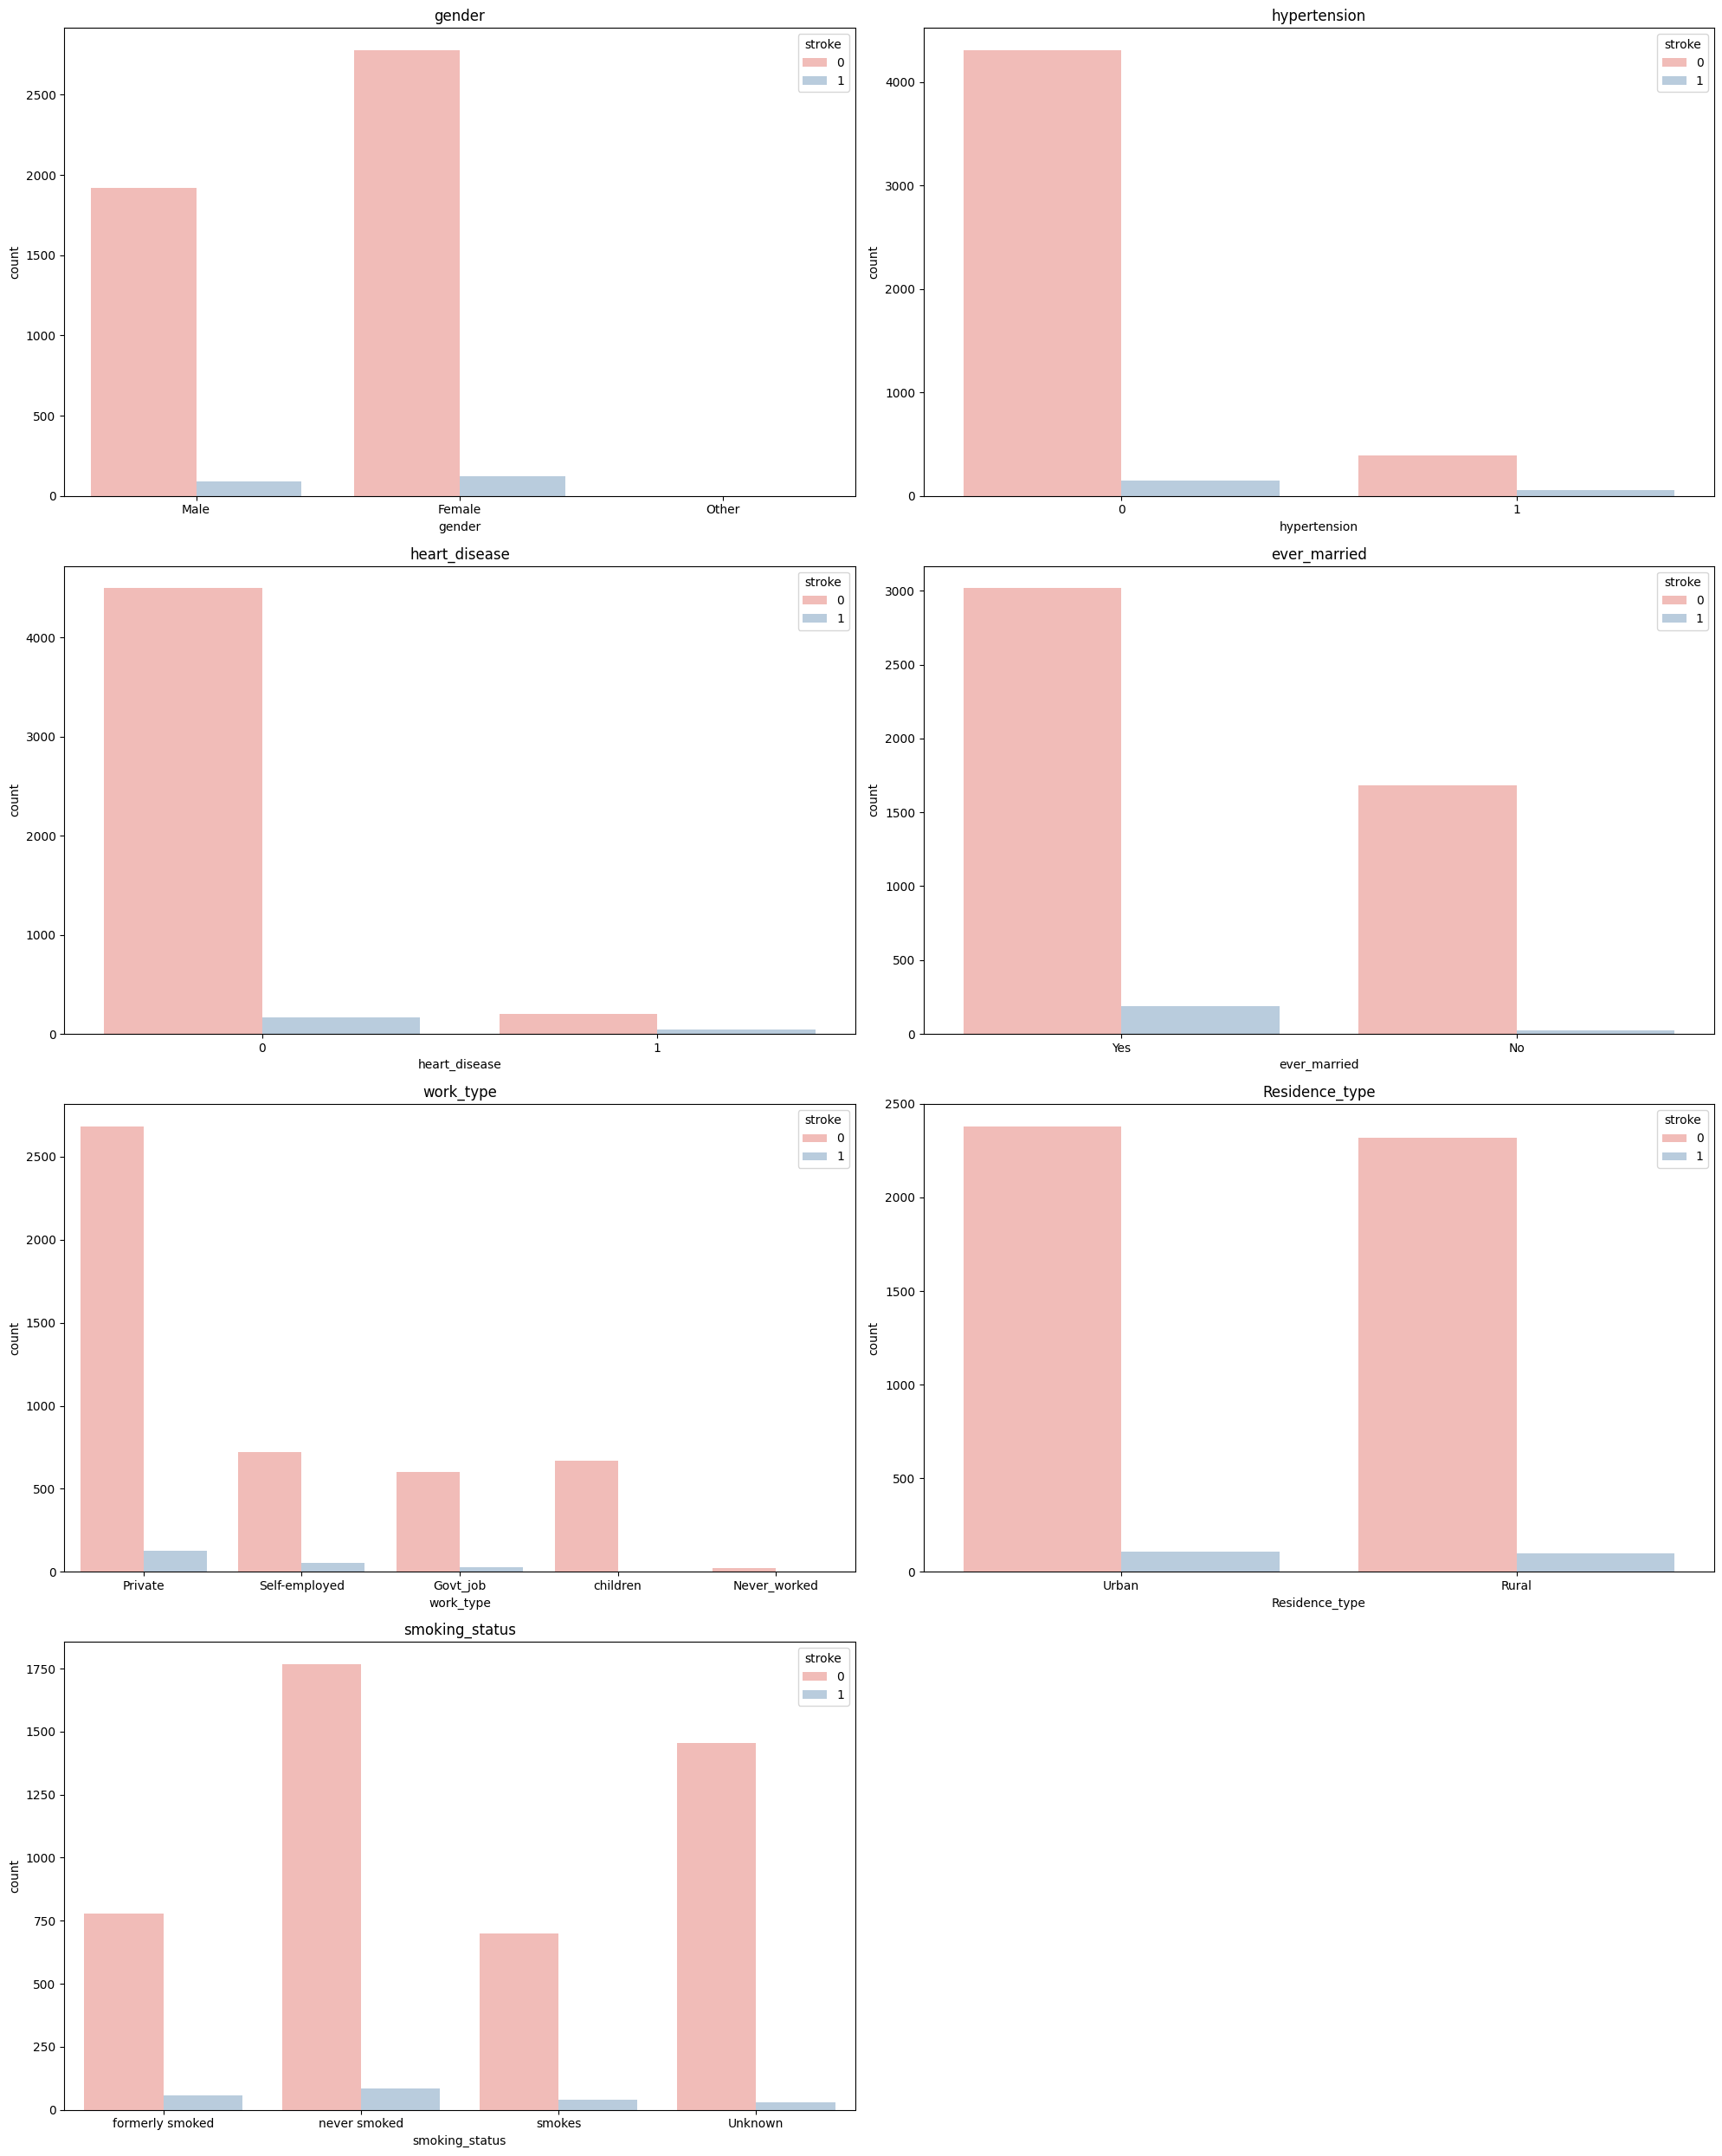

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Предполагается, что df содержит данные датасета

# Категоризация числовых переменных
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=['0-30', '31-60', '61-100'])
df['glucose_level_group'] = pd.cut(df['avg_glucose_level'], bins=[0, 80, 140, 200, 260, 320], labels=['0-80', '81-140', '141-200', '201-260', '261-320'])
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 40, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Extremely Obese'])
# Создание сетки графиков
fig, ax = plt.subplots(4, 2, figsize=(20, 25))  # Увеличенное количество строк для размещения всех графиков

# Список категориальных атрибутов
categorical_attributes = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                          'work_type', 'Residence_type', 'smoking_status']

# Графики для категориальных атрибутов
for i, attribute in enumerate(categorical_attributes):
    sns.countplot(x=attribute, hue='stroke', palette="Pastel1", data=df, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(attribute)

# Удаление неиспользуемых графиков
ax[3, 1].set_visible(False)

plt.savefig('Stroke_Distribution1.png', dpi=300)
plt.tight_layout()
plt.show()

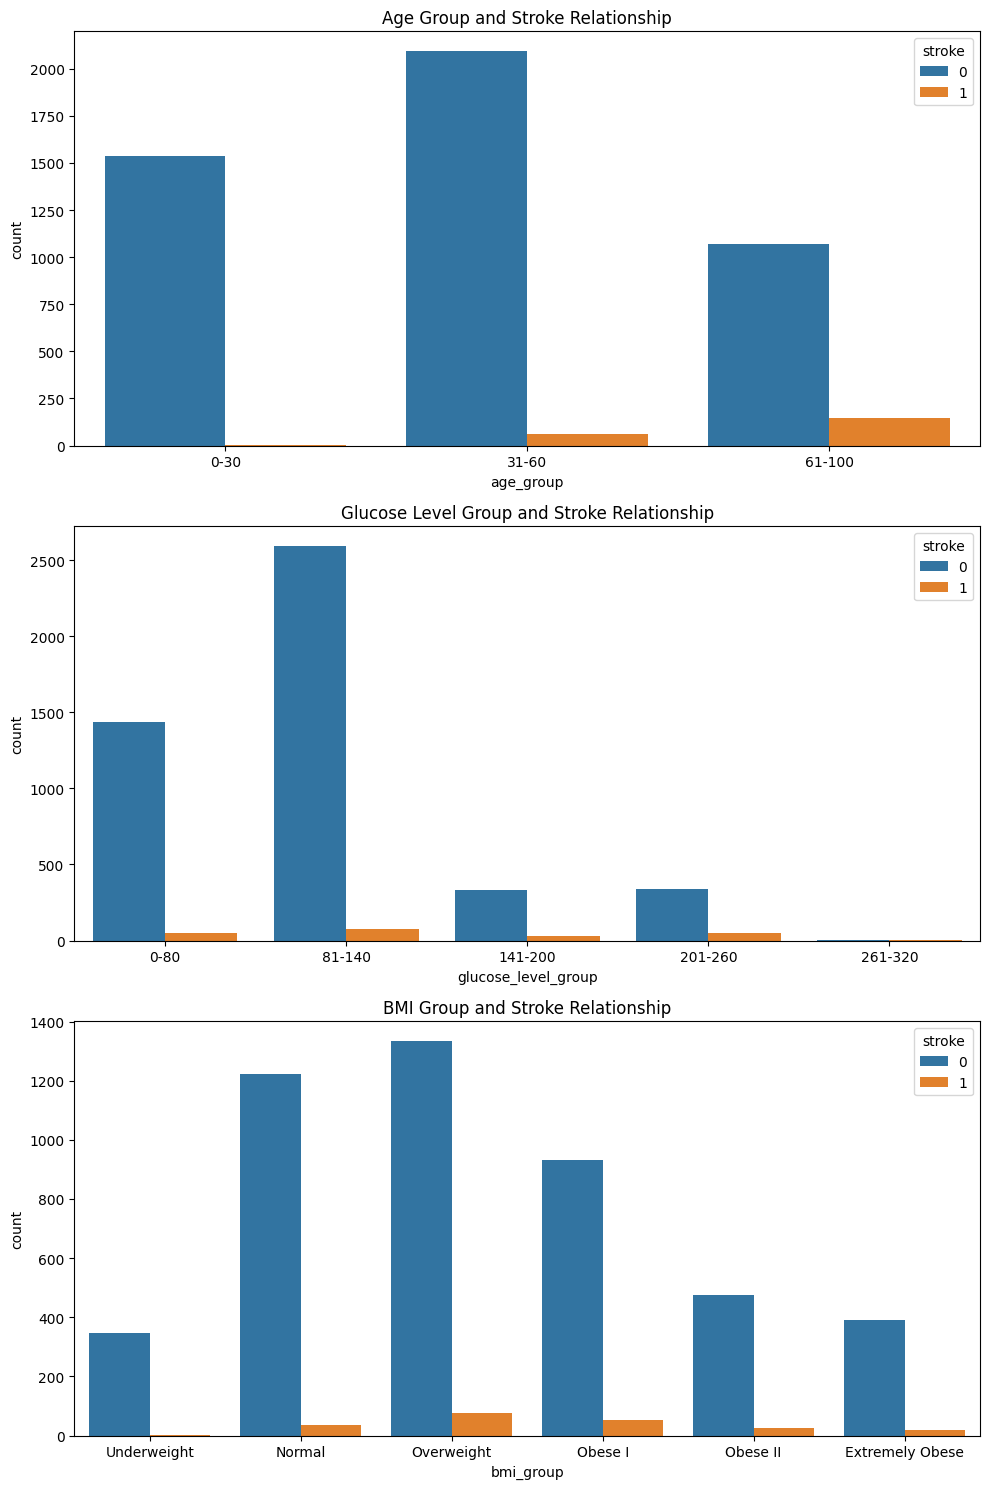

In [78]:
df_copy = df.copy()

# Категоризация числовых переменных
df_copy['age_group'] = pd.cut(df_copy['age'], bins=[0, 30, 60, 100], labels=['0-30', '31-60', '61-100'])
df_copy['glucose_level_group'] = pd.cut(df_copy['avg_glucose_level'], bins=[0, 80, 140, 200, 260, 320], labels=['0-80', '81-140', '141-200', '201-260', '261-320'])
df_copy['bmi_group'] = pd.cut(df_copy['bmi'], bins=[0, 18.5, 25, 30, 35, 40, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Extremely Obese'])

# Создание сетки графиков
f, ax = plt.subplots(3, 1, figsize=(10, 15))

# Визуализация связи между категоризированным 'age' и 'stroke'
sns.countplot(x='age_group', hue='stroke',palette="Pastel1", data=df_copy, ax=ax[0])
ax[0].set_title('Age Group and Stroke Relationship')

# Визуализация связи между категоризированным 'avg_glucose_level' и 'stroke'
sns.countplot(x='glucose_level_group', hue='stroke',palette="Pastel1", data=df_copy, ax=ax[1])
ax[1].set_title('Glucose Level Group and Stroke Relationship')

# Визуализация связи между категоризированным 'bmi' и 'stroke'
sns.countplot(x='bmi_group', hue='stroke',palette="Pastel1", data=df_copy, ax=ax[2])
ax[2].set_title('BMI Group and Stroke Relationship')

plt.tight_layout()
plt.savefig('Stroke_Distribution2.png', dpi=300)
plt.show()

<ipython-input-82-56d8c8a2ad09>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#F1BCB8', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
<ipython-input-82-56d8c8a2ad09>:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#B9CCDD', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
<ipython-input-82-56d8c8a2ad09>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#F1BCB8', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, leg

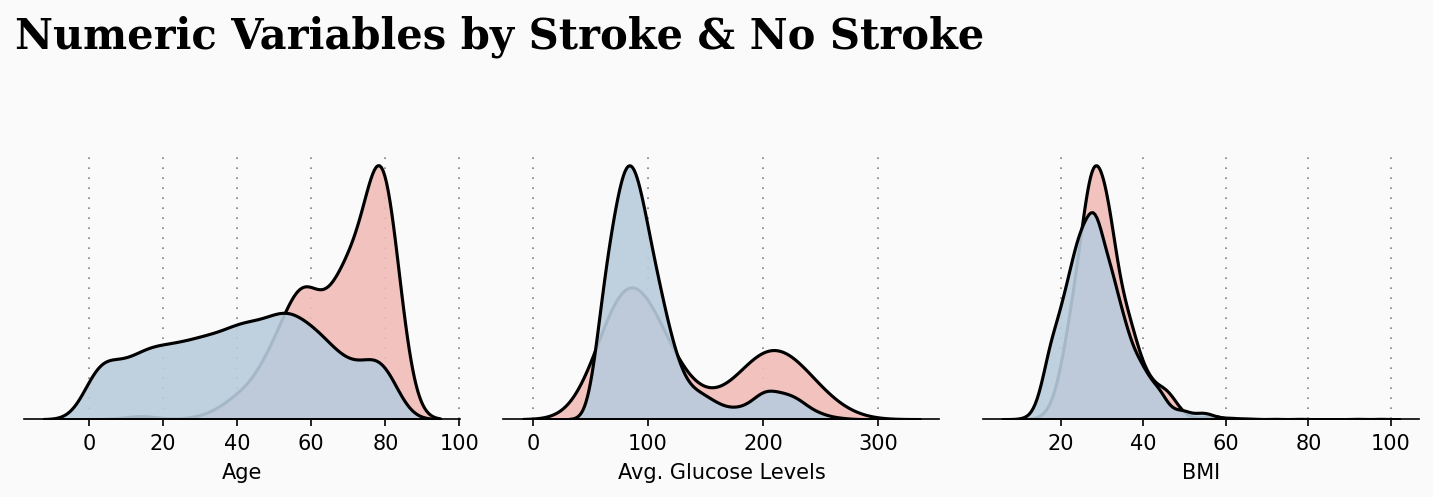

In [82]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#F1BCB8', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#B9CCDD', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()

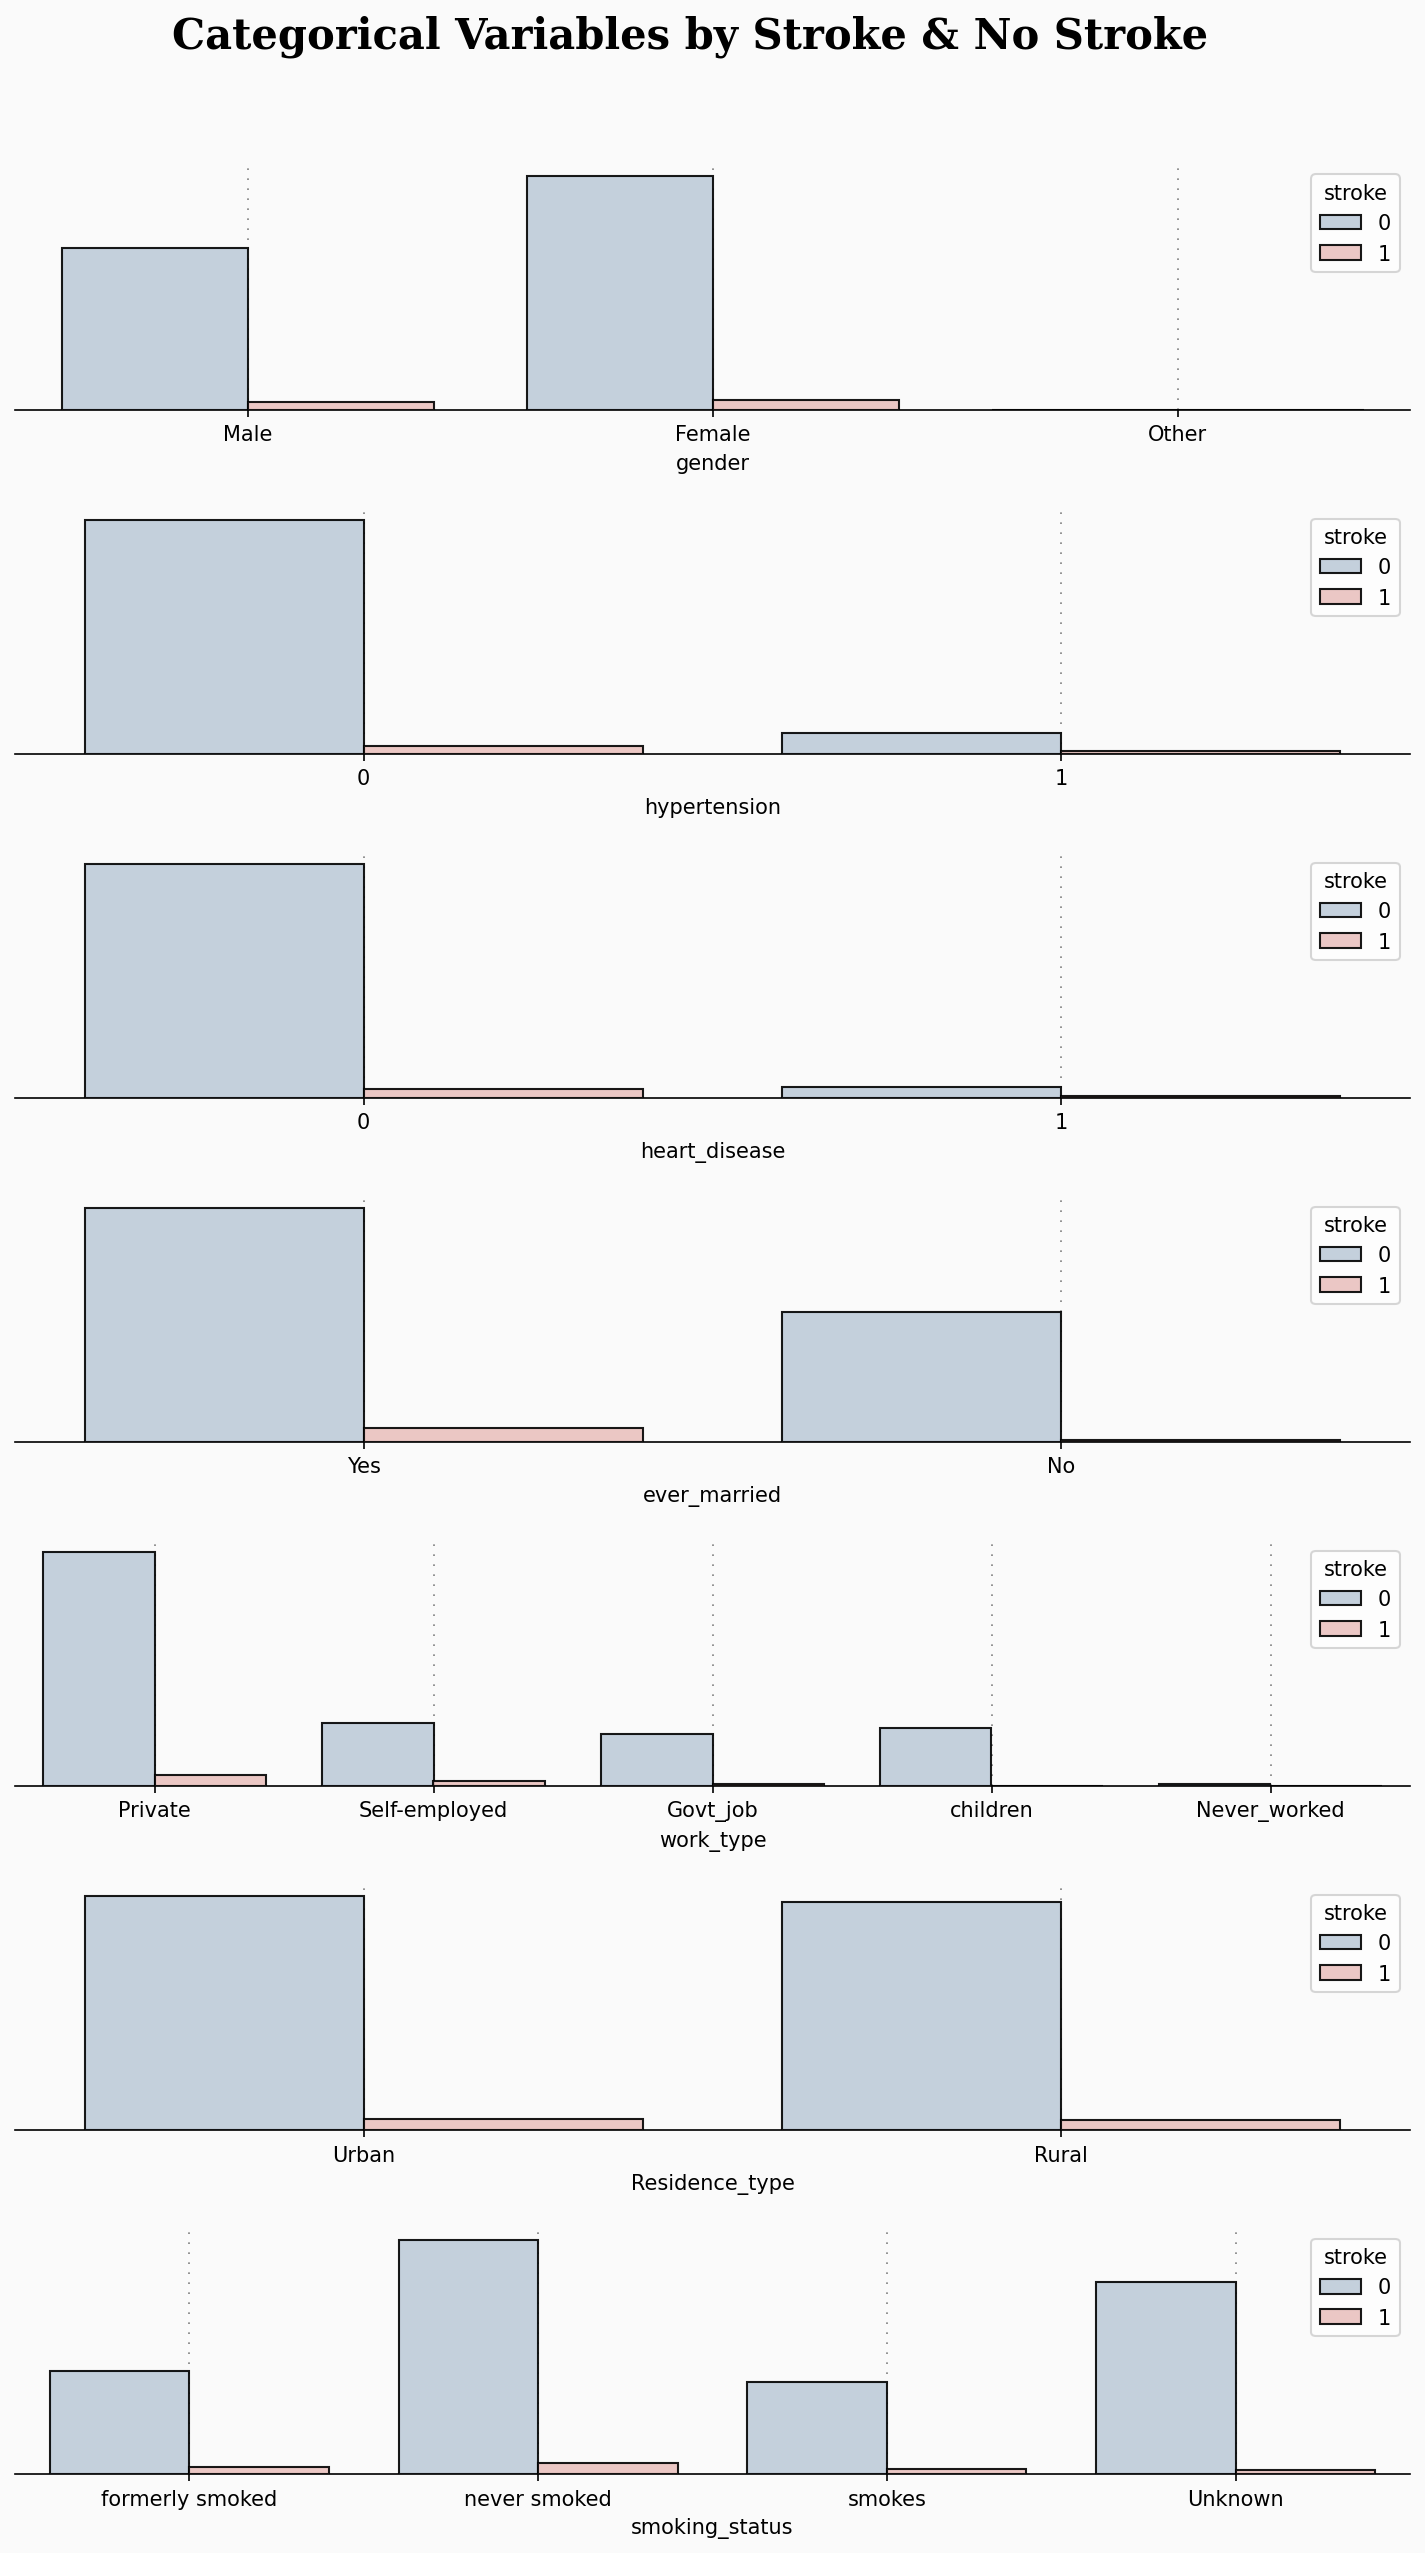

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что df содержит данные датасета

# Определение категориальных переменных
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Фоновый цвет и параметры фигуры
background_color = "#fafafa"
fig = plt.figure(figsize=(12, 20), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(7, 1)
gs.update(wspace=0.1, hspace=0.4)

# Цвета для групп
colors = ['#B9CCDD','#F1BCB8']  # Первый цвет для инсульта, второй - без инсульта

# Создание подграфиков для каждой категориальной переменной
for i, variable in enumerate(categorical_variables):
    ax = fig.add_subplot(gs[i, 0])
    ax.set_facecolor(background_color)
    ax.tick_params(axis='y', left=False)
    ax.get_yaxis().set_visible(False)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

    # Визуализация countplot для каждой переменной
    sns.countplot(x=variable, hue='stroke', data=df, palette=colors, ax=ax, alpha=0.9, zorder=3, edgecolor="black")
    ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
    ax.set_xlabel(variable)

# Добавление заголовка и описания
plt.suptitle('Categorical Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif', y=0.93)
plt.show()

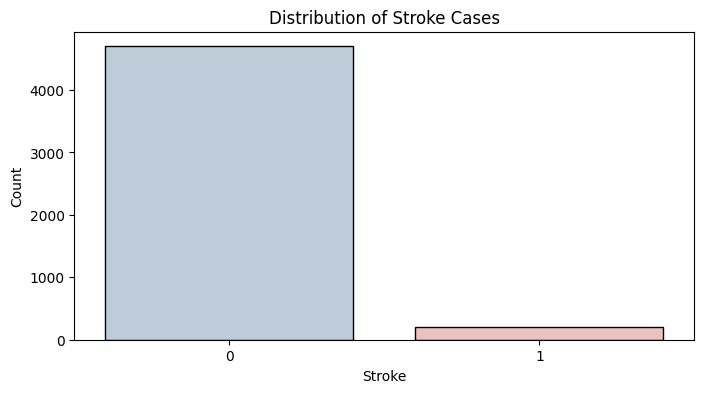

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Замените df на ваш датафрейм с данными
# df = pd.read_csv('your_dataframe.csv')

# Создание диаграммы для переменной 'stroke'
plt.figure(figsize=(8, 4))
sns.countplot(x='stroke', data=df, palette=['#B9CCDD','#F1BCB8'], edgecolor="black")
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

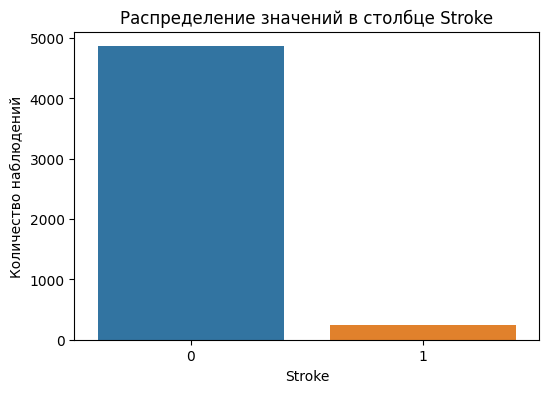

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Распределение значений в столбце Stroke')
plt.xlabel('Stroke')
plt.ylabel('Количество наблюдений')
plt.show()

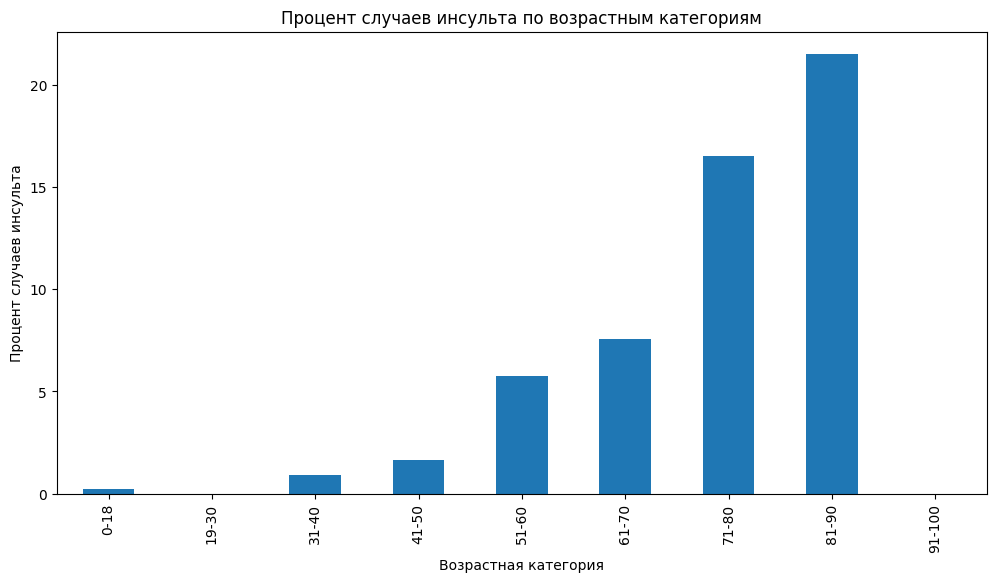

In [ ]:
# Определение границ и меток возрастных категорий
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

stroke_percentages = df.groupby('age_category')['stroke'].mean() * 100

stroke_percentages.plot(kind='bar', figsize=(12, 6))
plt.title('Процент случаев инсульта по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Процент случаев инсульта')
plt.show()

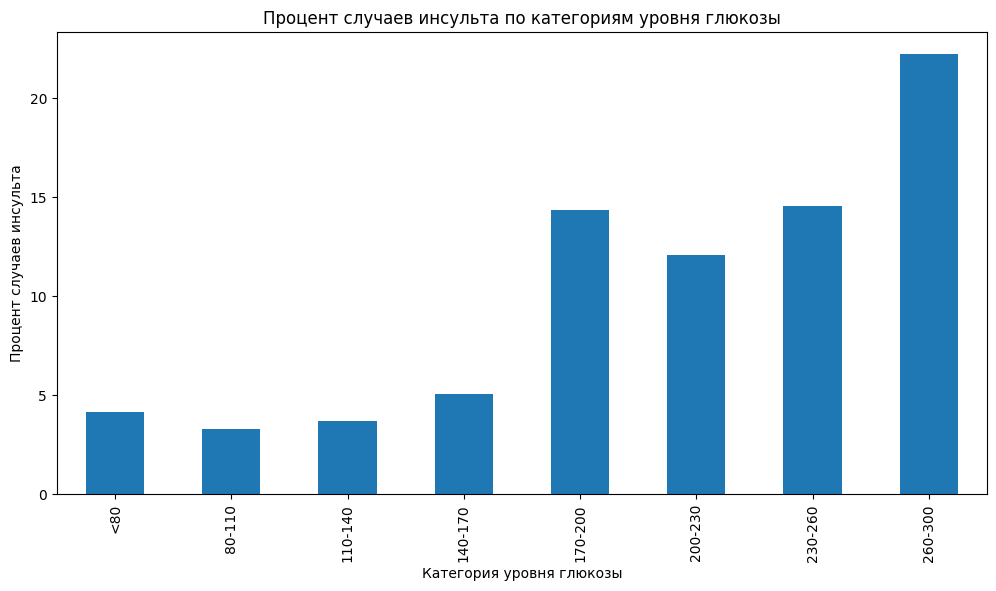

In [ ]:
glucose_bins = [0, 80, 110, 140, 170, 200, 230, 260, 300]
glucose_labels = ['<80', '80-110', '110-140', '140-170', '170-200', '200-230', '230-260', '260-300']
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels, right=False)

stroke_percentages_glucose = df.groupby('glucose_category')['stroke'].mean() * 100

# Визуализация
stroke_percentages_glucose.plot(kind='bar', figsize=(12, 6))
plt.title('Процент случаев инсульта по категориям уровня глюкозы')
plt.xlabel('Категория уровня глюкозы')
plt.ylabel('Процент случаев инсульта')
plt.show()

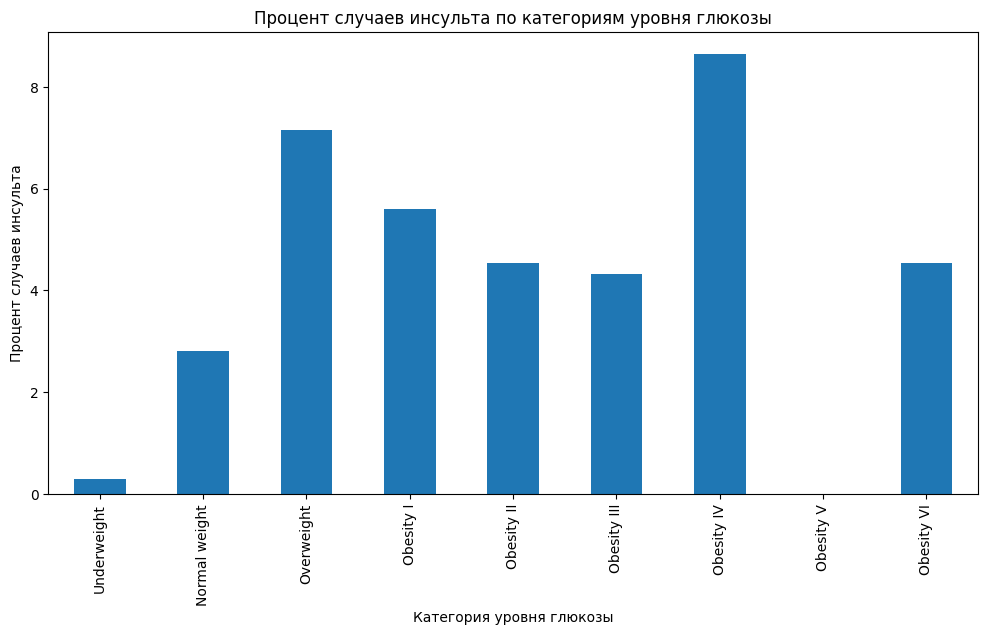

In [ ]:
# Бинаризация 'bmi'
bmi_bins = [0, 18.5, 25, 30, 35, 40, 45, 50, 55, 60]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III', 'Obesity IV', 'Obesity V', 'Obesity VI']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
stroke_percentages_glucose = df.groupby('bmi_category')['stroke'].mean() * 100
# Визуализация
stroke_percentages_glucose.plot(kind='bar', figsize=(12, 6))
plt.title('Процент случаев инсульта по категориям уровня глюкозы')
plt.xlabel('Категория уровня глюкозы')
plt.ylabel('Процент случаев инсульта')
plt.show()

In [98]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
columns_to_drop = ['age_category', 'glucose_category','bmi_category']
df = df.drop(columns=columns_to_drop)

In [ ]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [99]:
df_bin = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Бинаризация 'age'
step = 40
start, finish = df['age'].min(), df['age'].max()
for i in range(int(start), int(finish), step):
    df_bin[f'age({i}-{i+step})'] = df['age'].between(i, i+step, inclusive='left')

# Бинаризация 'avg_glucose_level'
step = 100
start, finish = df['avg_glucose_level'].min(), df['avg_glucose_level'].max()
for i in range(int(start), int(finish), step):
    df_bin[f'avg_glucose_level({i}-{i+step})'] = df['avg_glucose_level'].between(i, i+step, inclusive='left')

# Бинаризация 'bmi'
step = 20
start, finish = df['bmi'].min(), df['bmi'].max()
for i in range(int(start), int(finish), step):
    df_bin[f'bmi({i}-{i+step})'] = df['bmi'].between(i, i+step, inclusive='left')

columns_to_drop = ['age','bmi', 'avg_glucose_level']
df_bin = df_bin.drop(columns=columns_to_drop)
# Копирование столбца 'stroke' из исходного DataFrame
df_bin['stroke'] = df['stroke']
for column in df_bin.columns:
    if not all(df_bin[column].isin([0, 1])):
        raise ValueError(f"Столбец {column} содержит значения, отличные от 0 и 1")

# Преобразование всех столбцов DataFrame в булев тип
df_bin = df_bin.astype(bool)

# Проверка результатов
print(df_bin.head())
# Создание уникальных идентификаторов для каждого наблюдения
df_bin['sample_id'] = ['person_' + str(i) for i in range(df_bin.shape[0])]

# Установка 'sample_id' в качестве индекса
df_bin.set_index('sample_id', inplace=True)

# Преобразование 'stroke' в булев тип
df_bin['stroke'] = df_bin['stroke'].astype(bool)

# Сохранение обработанных данных в файл
df_bin.to_csv('binarized_data_2.csv', index=True)

# Вывод обработанного DataFrame
print(df_bin)

   hypertension  heart_disease  stroke  gender_Female  gender_Male  \
0         False           True    True          False         True   
2         False           True    True          False         True   
3         False          False    True           True        False   
4          True          False    True           True        False   
5         False          False    True          False         True   

   gender_Other  ever_married_No  ever_married_Yes  work_type_Govt_job  \
0         False            False              True               False   
2         False            False              True               False   
3         False            False              True               False   
4         False            False              True               False   
5         False            False              True               False   

   work_type_Never_worked  ...  age(40-80)  age(80-120)  \
0                   False  ...        True        False   
2               

In [103]:

df_bin.drop(columns='gender_Other', inplace=True)
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, person_0 to person_4908
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   hypertension                    4909 non-null   bool 
 1   heart_disease                   4909 non-null   bool 
 2   stroke                          4909 non-null   bool 
 3   gender_Female                   4909 non-null   bool 
 4   gender_Male                     4909 non-null   bool 
 5   ever_married_No                 4909 non-null   bool 
 6   ever_married_Yes                4909 non-null   bool 
 7   work_type_Govt_job              4909 non-null   bool 
 8   work_type_Never_worked          4909 non-null   bool 
 9   work_type_Private               4909 non-null   bool 
 10  work_type_Self-employed         4909 non-null   bool 
 11  work_type_children              4909 non-null   bool 
 12  Residence_type_Rural            4909 non-null   bool 

In [104]:
df_bin.to_csv('binarized_data_2.csv', index=True)

# DataFrame 3

In [123]:
df = df_3
import matplotlib.pyplot as plt
import seaborn as sns
df = df.dropna(subset=['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int')

<ipython-input-123-e683ba60616d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int')


<ipython-input-124-b39aaac3c020>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, categorical_indexes] = df.iloc[:, categorical_indexes].astype('category')


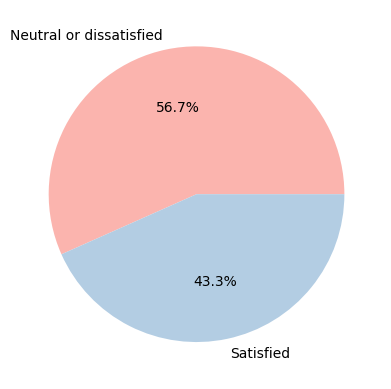

In [124]:
df = df.drop(df.iloc[:, [0, 1]], axis=1)

# Обновление списка индексов категориальных столбцов, исключив индекс столбца 'Age'
categorical_indexes = [0, 1] + list(range(6, 20))
df.iloc[:, categorical_indexes] = df.iloc[:, categorical_indexes].astype('category')

# Визуализация распределения удовлетворенности
plt.pie(df.satisfaction.value_counts(), labels=["Neutral or dissatisfied", "Satisfied"], colors=sns.color_palette("Pastel1"), autopct='%1.1f%%')
plt.show()



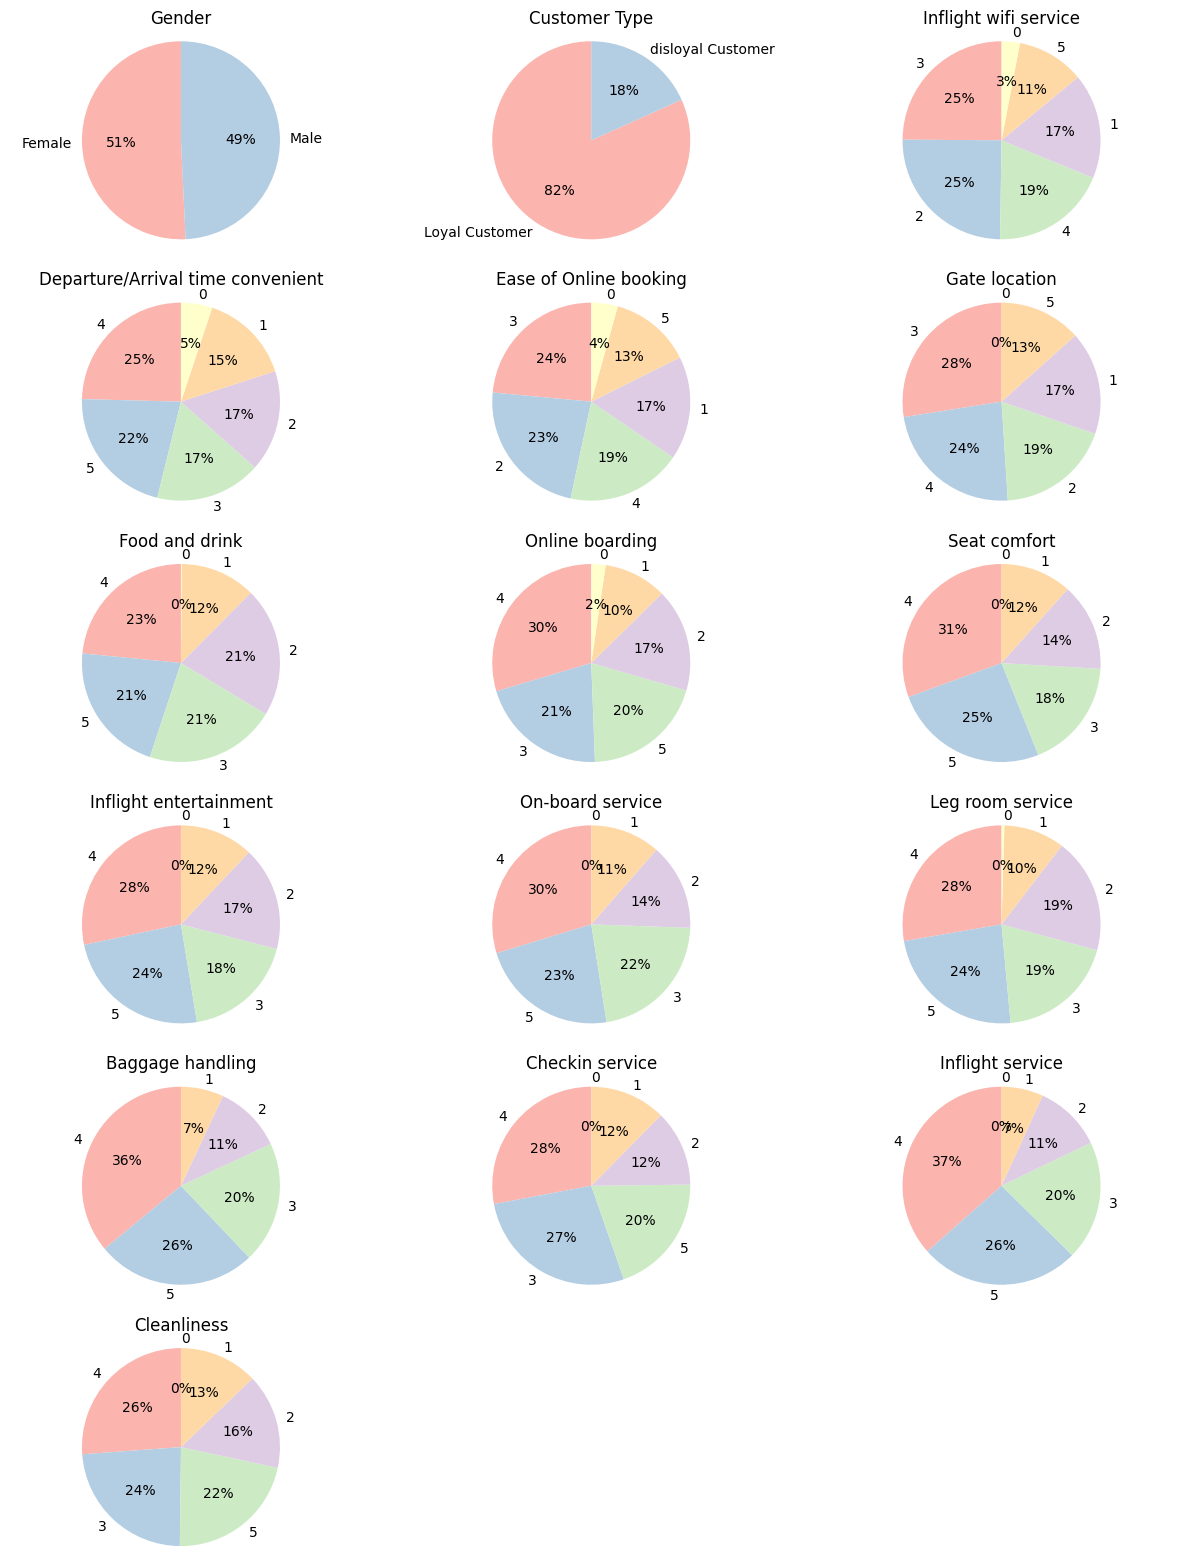

In [125]:
categ = df.iloc[:, categorical_indexes]

# Получение количества категориальных столбцов
num_cols = categ.shape[1]

# Вычисление размера сетки
num_rows = num_cols // 3 + (num_cols % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 3.3))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i].pie(sizes, labels=labels, colors=sns.color_palette("Pastel1"), autopct='%1.0f%%', startangle=90)
    axes[i].axis('equal')
    axes[i].set_title(col)

# Скрытие пустых графиков
for j in range(i + 1, num_rows * 3):
    axes[j].axis('off')

plt.savefig('Distribution2.png', dpi=300)
plt.show()

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


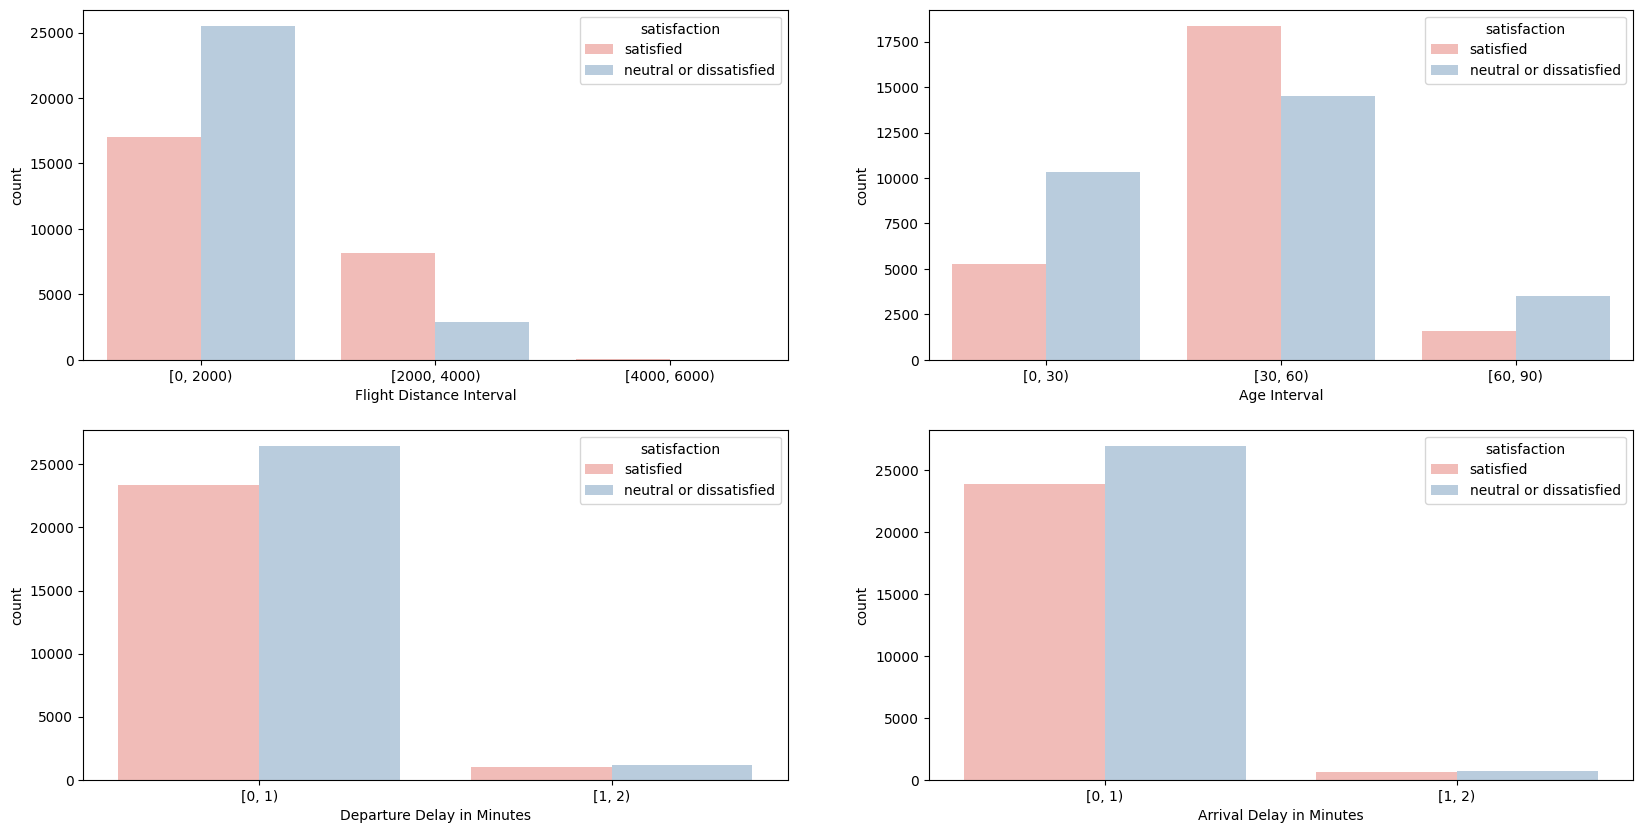

In [127]:
# Создание копии датафрейма
df_copy = df.copy()

# Ограничение значений задержек до 400 минут
df_copy = df_copy[df_copy['Departure Delay in Minutes'] <= 2]
df_copy = df_copy[df_copy['Arrival Delay in Minutes'] <= 2]

# Применение изменений к копии датафрейма
df_copy['Flight Distance Interval'] = pd.cut(df_copy['Flight Distance'], bins=range(0, df_copy['Flight Distance'].max() + 2000, 2000), right=False)
df_copy['Age Interval'] = pd.cut(df_copy['Age'], bins=range(0, df_copy['Age'].max() + 30, 30), right=False)
df_copy['Departure Delay in Minutes'] = pd.cut(df_copy['Departure Delay in Minutes'], bins=range(0, 3, 1), right=False)
df_copy['Arrival Delay in Minutes'] = pd.cut(df_copy['Arrival Delay in Minutes'], bins=range(0, 3, 1), right=False)

f, ax = plt.subplots(2, 2, figsize=(20, 10))

# Отрисовка графиков
sns.countplot(x='Flight Distance Interval', hue='satisfaction', palette="Pastel1", data=df_copy, ax=ax[0, 0])
sns.countplot(x='Age Interval', hue='satisfaction', palette="Pastel1", data=df_copy, ax=ax[0, 1])
sns.countplot(x='Departure Delay in Minutes', hue='satisfaction', palette="Pastel1", data=df_copy, ax=ax[1, 0])
sns.countplot(x='Arrival Delay in Minutes', hue='satisfaction', palette="Pastel1", data=df_copy, ax=ax[1, 1])
# Настройка отображения подписей оси X

plt.savefig('Distribution3.png', dpi=300)
plt.show()


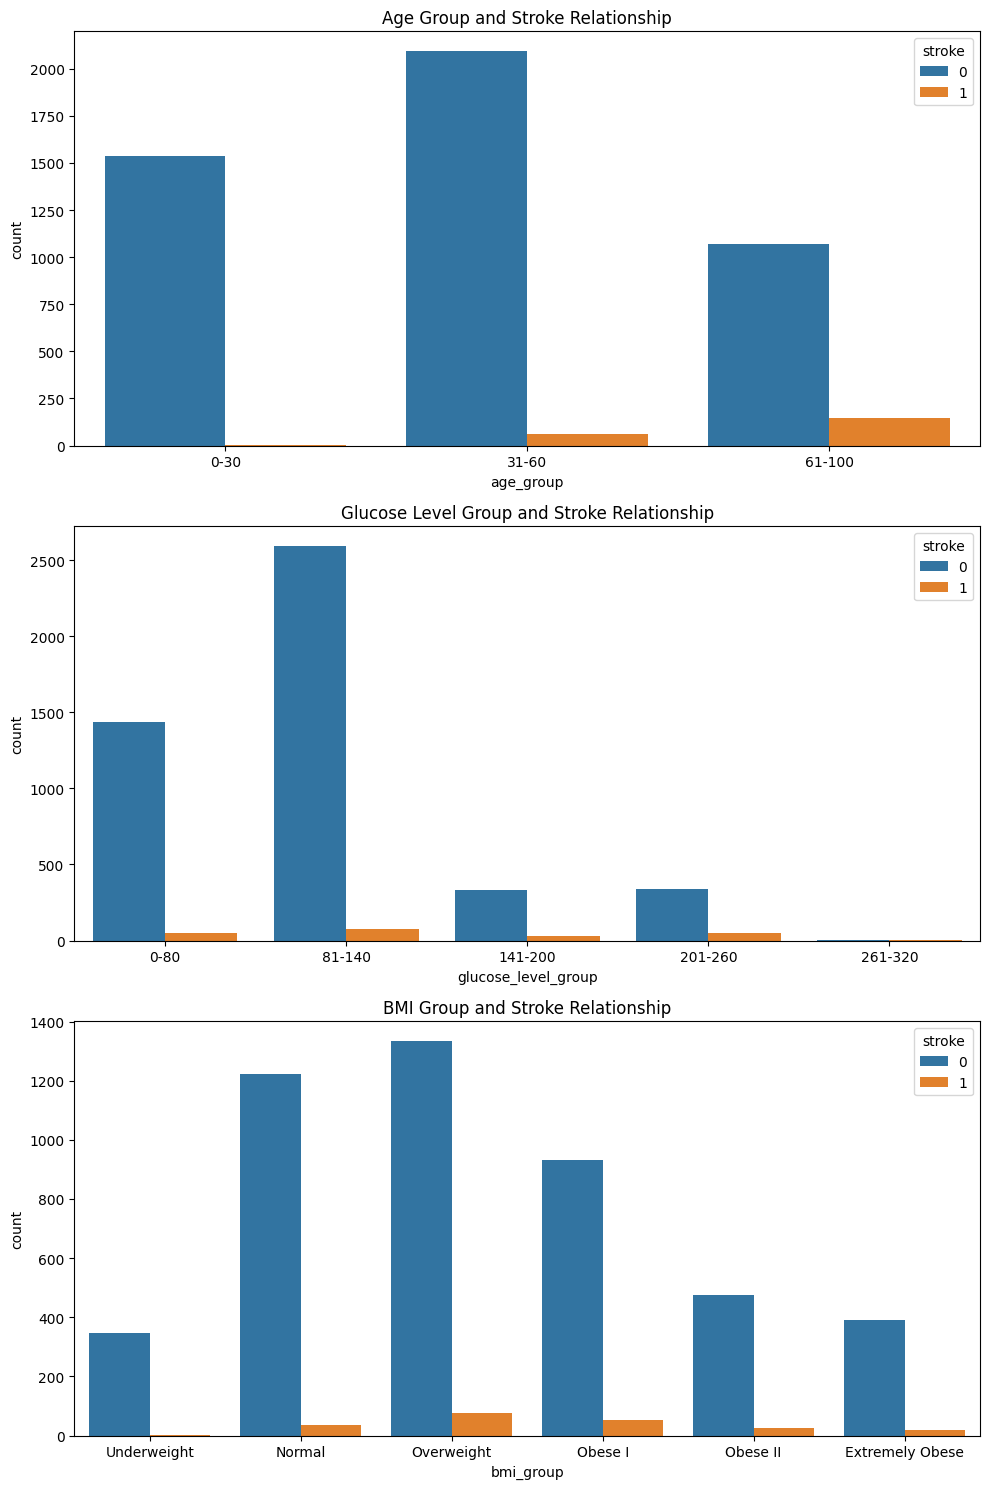

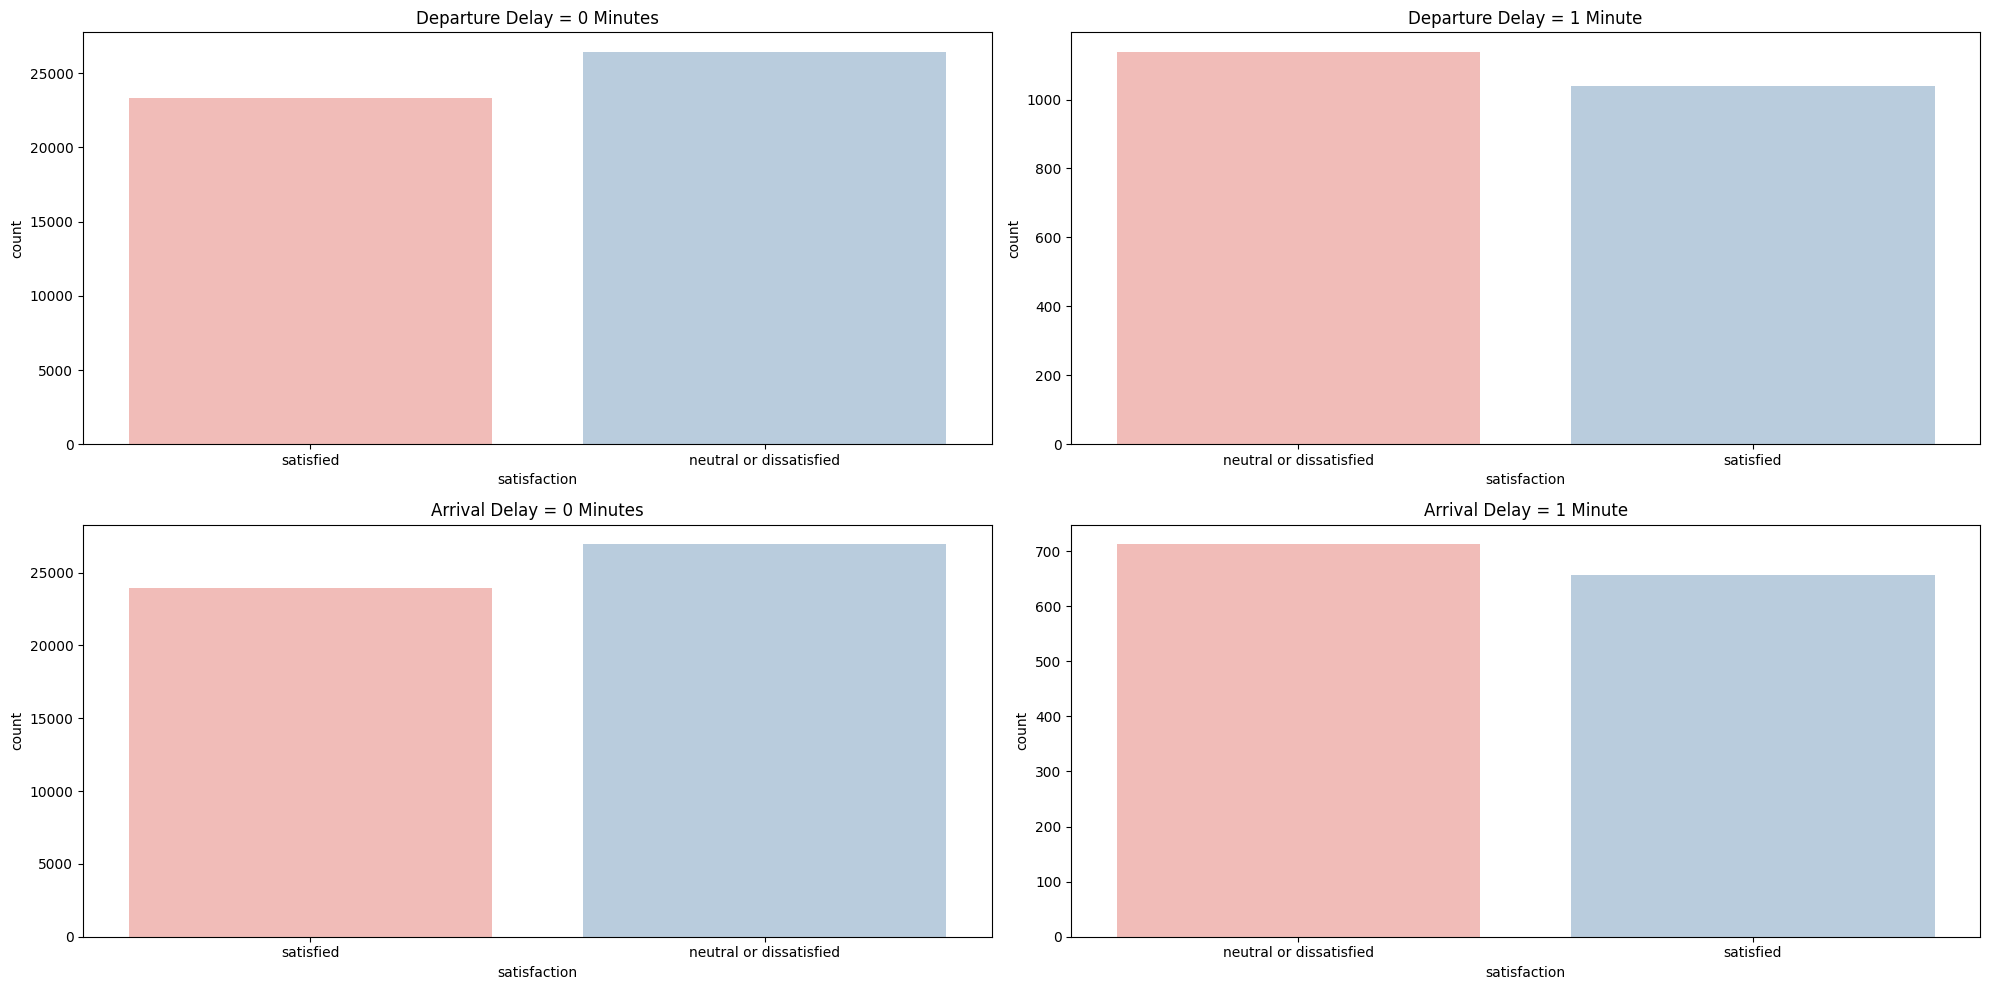

In [115]:
# Фильтрация данных для интервалов со строгими значениями 0 и 1
df_departure_0 = df_copy[df_copy['Departure Delay in Minutes'] == pd.Interval(0, 1, closed='left')]
df_departure_1 = df_copy[df_copy['Departure Delay in Minutes'] == pd.Interval(1, 2, closed='left')]
df_arrival_0 = df_copy[df_copy['Arrival Delay in Minutes'] == pd.Interval(0, 1, closed='left')]
df_arrival_1 = df_copy[df_copy['Arrival Delay in Minutes'] == pd.Interval(1, 2, closed='left')]

# Создание графиков
f, ax = plt.subplots(2, 2, figsize=(20, 10))

sns.countplot(x='satisfaction', palette="Pastel1", data=df_departure_0, ax=ax[0, 0])
ax[0, 0].set_title('Departure Delay = 0 Minutes')

sns.countplot(x='satisfaction', palette="Pastel1", data=df_departure_1, ax=ax[0, 1])
ax[0, 1].set_title('Departure Delay = 1 Minute')

sns.countplot(x='satisfaction', palette="Pastel1", data=df_arrival_0, ax=ax[1, 0])
ax[1, 0].set_title('Arrival Delay = 0 Minutes')

sns.countplot(x='satisfaction', palette="Pastel1", data=df_arrival_1, ax=ax[1, 1])
ax[1, 1].set_title('Arrival Delay = 1 Minute')

plt.tight_layout()
plt.savefig('DelayVsSatisfaction.png', dpi=300)
plt.show()

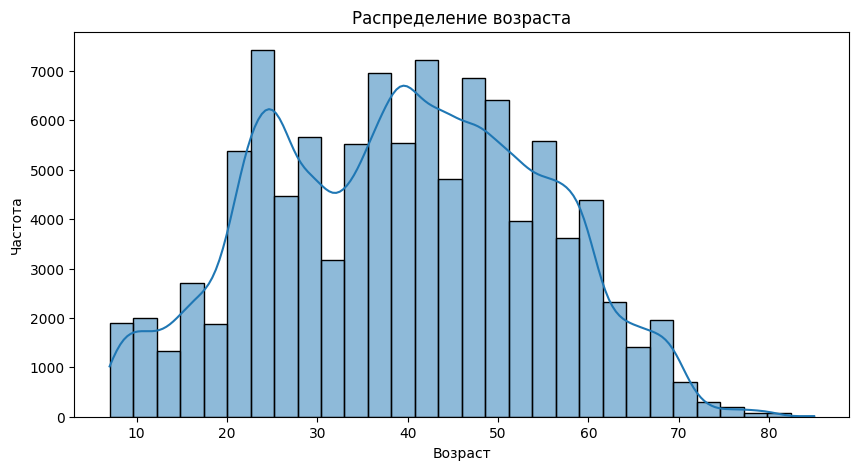

In [58]:
# Гистограмма для 'age'
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


In [138]:
df = df_3
import matplotlib.pyplot as plt
import seaborn as sns
df = df.dropna(subset=['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int')

<ipython-input-138-e683ba60616d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int')


In [139]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)
df.isna().sum()

<ipython-input-139-0fe5fa27d6ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)


Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [140]:
df.sample()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25688,25688,79880,Male,Loyal Customer,55,Business travel,Business,1911,2,3,...,3,3,3,3,3,3,4,0,4,satisfied


In [141]:
df_bin = pd.DataFrame()
# Бинаризация атрибутов с оценкой от 1 до 5
rating_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

for col in rating_columns:
    df_bin[f'{col}_high'] = df[col].apply(lambda x: True if x >= 4 else False)

# Бинаризация числовых атрибутов 'Age' и 'Flight distance'
age_step = 30
start, finish = df['Age'].min(), df['Age'].max()
for i in range(int(start), int(finish), age_step):
    df_bin[f'Age_{i}_{i+age_step}'] = df['Age'].between(i, i+age_step, inclusive='left')

distance_step = 2000
start, finish = df['Flight Distance'].min(), df['Flight Distance'].max()
for i in range(int(start), int(finish), distance_step):
    df_bin[f'Flight Distance_{i}_{i+distance_step}'] = df['Flight Distance'].between(i, i+distance_step, inclusive='left')

# One-Hot Encoding для категориальных атрибутов
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_bin['satisfaction'] = df['satisfaction'].apply(lambda x: True if x == 'satisfied' else False)


df_bin = df_bin.join(pd.get_dummies(df[categorical_columns]))
for col in df_bin.columns:
    if df_bin[col].dtype == 'uint8':
        df_bin[col] = df_bin[col].astype(bool)

# Бинаризация для 'Departure Delay in Minutes' и 'Arrival Delay in Minutes'
df_bin['Departure_Is_Delay'] = df['Departure Delay in Minutes'].apply(lambda x: True if x > 0 else False)
df_bin['Arrival_Is_Delay'] = df['Arrival Delay in Minutes'].apply(lambda x: True if x > 0 else False)
df_bin['sample_id'] = ['Person_' + str(i) for i in range(df_bin.shape[0])]
df_bin.set_index('sample_id', inplace=True)


In [142]:
# Объединение классов 'Business', 'Eco', и 'Eco Plus'
df_bin['Class_Business'] = df_bin['Class_Business'].astype(bool)
df_bin['Class_Eco'] = (df_bin['Class_Eco'] | df_bin['Class_Eco Plus']).astype(bool)

# Удаление столбца 'Class_Eco Plus', так как он больше не нужен
df_bin = df_bin.drop(columns=['Class_Eco Plus'])

In [144]:

df_bin = df_bin.drop(df_bin.tail(15000).index)
df_bin.to_csv('binarized_data_3.csv', index=True)

In [145]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88594 entries, Person_0 to Person_88593
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Inflight wifi service_high              88594 non-null  bool 
 1   Departure/Arrival time convenient_high  88594 non-null  bool 
 2   Ease of Online booking_high             88594 non-null  bool 
 3   Gate location_high                      88594 non-null  bool 
 4   Food and drink_high                     88594 non-null  bool 
 5   Online boarding_high                    88594 non-null  bool 
 6   Seat comfort_high                       88594 non-null  bool 
 7   Inflight entertainment_high             88594 non-null  bool 
 8   On-board service_high                   88594 non-null  bool 
 9   Leg room service_high                   88594 non-null  bool 
 10  Baggage handling_high                   88594 non-null  bool 
 11  Checki

In [ ]:
df_bin.isna().sum()

Inflight wifi service_high                0
Departure/Arrival time convenient_high    0
Ease of Online booking_high               0
Gate location_high                        0
Food and drink_high                       0
Online boarding_high                      0
Seat comfort_high                         0
Inflight entertainment_high               0
On-board service_high                     0
Leg room service_high                     0
Baggage handling_high                     0
Checkin service_high                      0
Inflight service_high                     0
Cleanliness_high                          0
Age_7_17                                  0
Age_17_27                                 0
Age_27_37                                 0
Age_37_47                                 0
Age_47_57                                 0
Age_57_67                                 0
Age_67_77                                 0
Age_77_87                                 0
Flight Distance_31_531          